In [1]:
#import the libraries

import pandas as pd
import numpy as np

#import the data
file_path = "C:\\Users\\georg\\OneDrive\\Υπολογιστής\\loan_data.csv"

df = pd.read_csv(file_path)

Let's check the first 5 rows of the dataset

In [2]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Let's check the shape of the dataset

In [3]:
#dataset shape
print(f'The dataset has {df.shape[0]} rows & {df.shape[1]} columns.')

The dataset has 45000 rows & 14 columns.


Let's check the types from the features

In [4]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

Let's see if there are any missing values on the dataset

In [5]:
#check missing values on every feature
missing_values = df.isnull().sum()
print(missing_values)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


From the above, we can see that there are not any missing values on our dataset.

Let's check for outliers.

On our dataset, there is the feature person_age, which indicates the age from the person.
Let's see which is the range of the age.

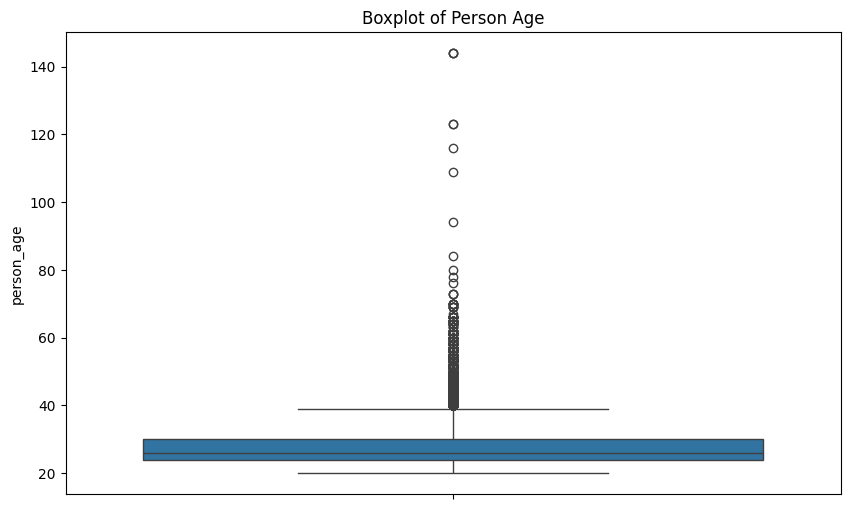

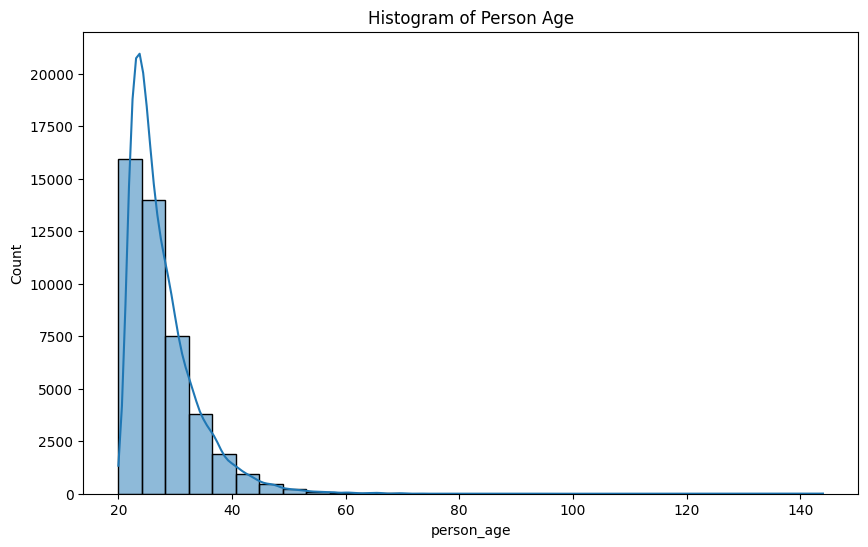

In [6]:
#Let's handle the outliers from the column "person_age"
import seaborn as sns
import matplotlib.pyplot as plt

#Let's visualize the outliers by using the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['person_age'])
plt.title('Boxplot of Person Age')
plt.show()

# Let's visualize the range of the values using the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['person_age'], bins=30, kde=True)
plt.title('Histogram of Person Age')
plt.show()

In [38]:
print("Min age:", df["person_age"].min())
print("Max age:", df["person_age"].max())

Min age: 20.0
Max age: 144.0


Ftom the above graphs we can see that there are people with ages up to higher than 140 yeas old, so we are going to drop the intsances with age>70.

In [7]:
#Let's create the a new dataframe, with max person_age=70
filtered_df = df[df['person_age'] <=70].copy()

In [8]:
#Let's check if the dataframe was filtered succesfully.
print(filtered_df['person_age'].max())

70.0


Let's check the shape from the filtered df.

In [9]:
#New dataframe shape
print(f'The dataset has {filtered_df.shape[0]} rows & {filtered_df.shape[1]} columns.')

The dataset has 44985 rows & 14 columns.


Now we want to see the correlation between the features of our dataset and the target_class.
To calculate the correlatoion, the features must have type numeric, so we have to transform the features from categorical to numerical type.
For the binary features we can use the method of "Label Encoding", for the features with distinct values more than 2, we can use the method "One-Hot Encoding".

In [10]:
#Check the different values on each categorical feature

# List of categorical features
categorical_features = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'previous_loan_defaults_on_file'
]

# Print unique values count for each categorical feature
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")
    print(df[feature].unique())  # Optional: Prints the unique categories
    print("-" * 40)

person_gender: 2 unique values
['female' 'male']
----------------------------------------
person_education: 5 unique values
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
----------------------------------------
person_home_ownership: 4 unique values
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
----------------------------------------
loan_intent: 6 unique values
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
----------------------------------------
previous_loan_defaults_on_file: 2 unique values
['No' 'Yes']
----------------------------------------


Now let's transform the categorical features to numerical

In [11]:
from sklearn.preprocessing import LabelEncoder

# Categorical Features
categorical_features = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'previous_loan_defaults_on_file'
]

#Apply the Label-Encoding method
label_encoder = LabelEncoder()
filtered_df['person_gender'] = label_encoder.fit_transform(filtered_df['person_gender'])
filtered_df['previous_loan_defaults_on_file'] = label_encoder.fit_transform(filtered_df['previous_loan_defaults_on_file'])

#Apply the One-Hot Encoding method
filtered_df = pd.get_dummies(filtered_df, columns=['person_education', 'person_home_ownership', 'loan_intent'], drop_first=True)

# Print transformed DataFrame
print(filtered_df.head())

#Print the shape of the filtered_df
print(f'The dataset has {filtered_df.shape[0]} rows & {filtered_df.shape[1]} columns.')

   person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
0        22.0              0        71948.0               0    35000.0   
1        21.0              0        12282.0               0     1000.0   
2        25.0              0        12438.0               3     5500.0   
3        23.0              0        79753.0               0    35000.0   
4        24.0              1        66135.0               1    35000.0   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          16.02                 0.49                         3.0   
1          11.14                 0.08                         2.0   
2          12.87                 0.44                         3.0   
3          15.23                 0.44                         2.0   
4          14.27                 0.53                         4.0   

   credit_score  previous_loan_defaults_on_file  ...  \
0           561                               0  ...   
1           504             

Now all the features has categorical type but they have different range, so we can set the range to every feature on the same level.
In order to achive that we can apply the method of normalization or standardization.
in our case we will apply the method of normalization, so all the features will have values on the range [0,1].

In [12]:
filtered_df.dtypes

person_age                        float64
person_gender                       int32
person_income                     float64
person_emp_exp                      int64
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int32
loan_status                         int64
person_education_Bachelor            bool
person_education_Doctorate           bool
person_education_High School         bool
person_education_Master              bool
person_home_ownership_OTHER          bool
person_home_ownership_OWN            bool
person_home_ownership_RENT           bool
loan_intent_EDUCATION                bool
loan_intent_HOMEIMPROVEMENT          bool
loan_intent_MEDICAL                  bool
loan_intent_PERSONAL                 bool
loan_intent_VENTURE                  bool
dtype: object

In [13]:
#import the libraries
from sklearn.preprocessing import MinMaxScaler

#Create the MinMaxScaler
scaler = MinMaxScaler()

#Select only the numerical features
numerical_features = filtered_df.select_dtypes(include=['float64', 'int64', 'int32', 'uint8']).columns

#Normalize the features from the filtered_df 
norm_df = filtered_df.copy()

#Apply the normalization method to all features
norm_df[numerical_features] = scaler.fit_transform(norm_df[numerical_features])

#Print the first 5 rows from the normalized df
print(norm_df.head())

   person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
0        0.04            0.0       0.026201            0.00   1.000000   
1        0.02            0.0       0.001754            0.00   0.014493   
2        0.10            0.0       0.001818            0.06   0.144928   
3        0.06            0.0       0.029399            0.00   1.000000   
4        0.08            1.0       0.023819            0.02   1.000000   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0       0.727023             0.742424                    0.035714   
1       0.392318             0.121212                    0.000000   
2       0.510974             0.666667                    0.035714   
3       0.672840             0.666667                    0.000000   
4       0.606996             0.803030                    0.071429   

   credit_score  previous_loan_defaults_on_file  ...  \
0      0.434010                             0.0  ...   
1      0.289340             

All the valeus on the numerical data are on the same range [0,1].
Now we can calculate the correlation between each feature and the target class, also we can apply machine learing algorithms.

Let's calculate the correlation between each feature and the target class.

In [14]:
#Calculate the correlation each feature with the target class ('loan_status')
correlation_with_target = norm_df.corr()['loan_status']
print(correlation_with_target)

person_age                       -0.019858
person_gender                    -0.000496
person_income                    -0.169056
person_emp_exp                   -0.018833
loan_amnt                         0.107694
loan_int_rate                     0.332032
loan_percent_income               0.384864
cb_person_cred_hist_length       -0.014299
credit_score                     -0.007235
previous_loan_defaults_on_file   -0.543300
loan_status                       1.000000
person_education_Bachelor         0.004769
person_education_Doctorate        0.001812
person_education_High School      0.001304
person_education_Master          -0.004818
person_home_ownership_OTHER       0.013637
person_home_ownership_OWN        -0.093719
person_home_ownership_RENT        0.255321
loan_intent_EDUCATION            -0.064048
loan_intent_HOMEIMPROVEMENT       0.033779
loan_intent_MEDICAL               0.065314
loan_intent_PERSONAL             -0.022478
loan_intent_VENTURE              -0.085972
Name: loan_

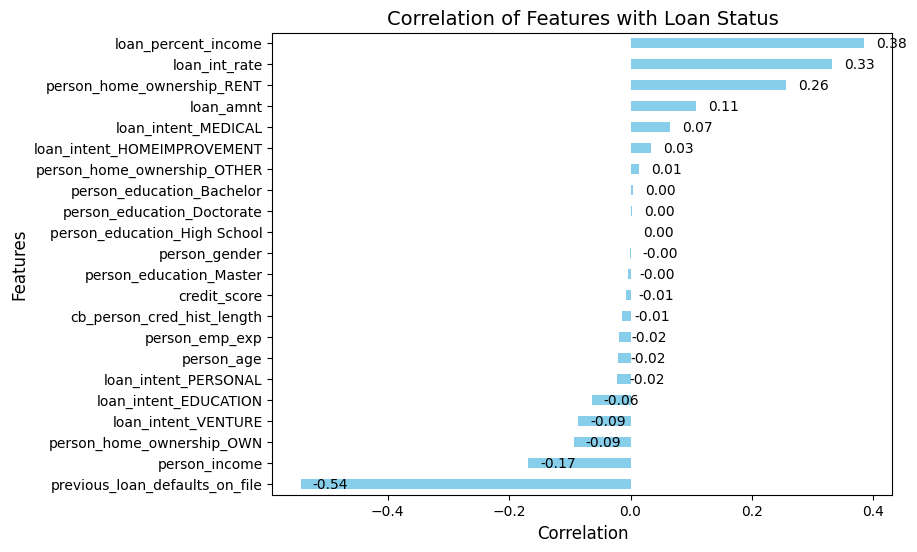

In [15]:
#Let's visualize the above with a bar plot

#import the libraries
import matplotlib.pyplot as plt

#Create the horizontal bar plot
plt.figure(figsize=(8, 6))
ax = correlation_with_target.drop('loan_status').sort_values(ascending=True).plot(kind='barh', color='skyblue')

#Add title & labels
plt.title('Correlation of Features with Loan Status', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)

#Add the value near the bar
for i, v in enumerate(correlation_with_target.drop('loan_status').sort_values(ascending=True)):
    ax.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=10)

#Print the plot
plt.show()

Now we are going to apply machine leaning algorithms for classification problem.
Note: First we are going to apply the algorithms using all the features and if it is needed we will apply the method of PCA (dimension reduction)

Let's split the data to train & test 

In [16]:
#import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Let's split the data to features & target class
X = norm_df.drop('loan_status', axis=1) #features
y = norm_df['loan_status'] #target class

#Let's split the data to train & test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Classification Problem

Logistic Regression

In [17]:
#Let's create and train the model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)

#Let's make predictions with the model
y_pred = model_lr.predict(X_test)

#Let's calculate the metrics
accuracy_lr = accuracy_score(y_test,y_pred)
conf_matrix_lr = confusion_matrix(y_test,y_pred)
class_report_lr = classification_report(y_test,y_pred)

print(f"The accuracy for the Logistic Regression Model is: {accuracy_lr:.2f}")
print("The confusion matrix of the Logistic Regression Model is:")
print(conf_matrix_lr)
print("The classification report of the Logistic Regression is:")
print(class_report_lr)



The accuracy for the Logistic Regression Model is: 0.90
The confusion matrix of the Logistic Regression Model is:
[[6562  425]
 [ 485 1525]]
The classification report of the Logistic Regression is:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      6987
         1.0       0.78      0.76      0.77      2010

    accuracy                           0.90      8997
   macro avg       0.86      0.85      0.85      8997
weighted avg       0.90      0.90      0.90      8997



Let's calculate the ROC-AUC Curve

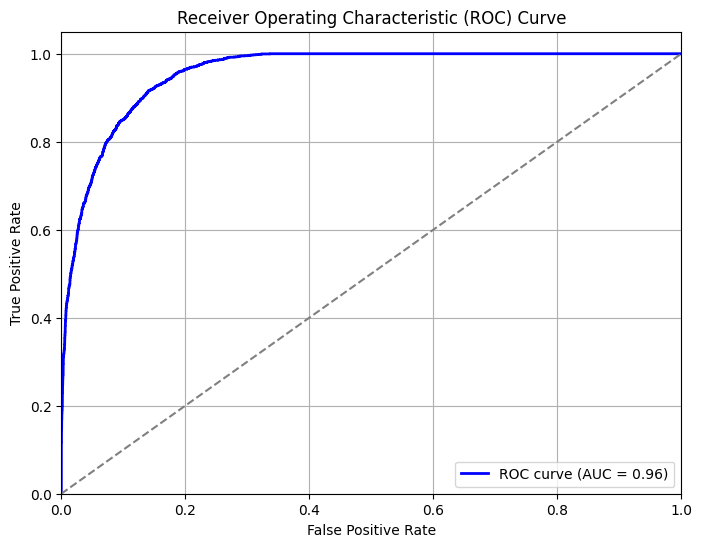

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities (instead of just 0/1 labels)
y_scores = model_lr.predict_proba(X_test)[:, 1]  # Take only the probabilities for class 1

# Compute True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Let's see how can we improve the performance of our model.
We are going to use the method GridSearchCV.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Let's define the parameters 
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       
    'penalty': ['l1', 'l2'],            
    'solver': ['liblinear', 'saga']   
}

#Let's define the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#Let's use the GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, 
                           cv=5, scoring='roc_auc', 
                           n_jobs=-1, verbose=2)

#Train of the GridSearchCV
grid_search.fit(X_train, y_train)

#Print the best parameters
print("Best Parameters:", grid_search.best_params_)

#Best Model
best_log_model = grid_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [20]:
#Best Model from the GridSearchCV
best_log_model = grid_search.best_estimator_

#Make predictions
y_pred = best_log_model.predict(X_test)

#Calculate the evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred)

#Print the results
print(f"The accuracy for the Logistic Regression Model is: {accuracy_lr:.2f}")
print("The confusion matrix of the Logistic Regression Model is:")
print(conf_matrix_lr)
print("The classification report of the Logistic Regression is:")
print(class_report_lr)

The accuracy for the Logistic Regression Model is: 0.90
The confusion matrix of the Logistic Regression Model is:
[[6560  427]
 [ 485 1525]]
The classification report of the Logistic Regression is:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      6987
         1.0       0.78      0.76      0.77      2010

    accuracy                           0.90      8997
   macro avg       0.86      0.85      0.85      8997
weighted avg       0.90      0.90      0.90      8997



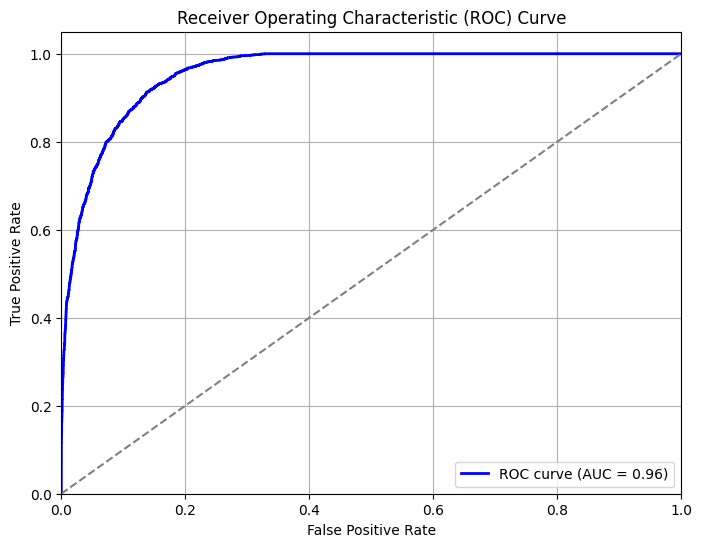

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities (instead of just 0/1 labels)
y_scores = best_log_model.predict_proba(X_test)[:, 1]  # Take only the probabilities for class 1

# Compute True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

After using the GridSearchCV and finding the best parameters we see that the results remains the same.

XG-Boost 

In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Create and train the XGBoost
model_xgb = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train, y_train)

#Let's make predictions with the model
y_pred_xgb = model_xgb.predict(X_test)

#Let's calculate the evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

#Print the results
print(f"The accuracy for the XGBoost Model is: {accuracy_xgb:.2f}")
print("The confusion matrix of the XGBoost Model is:")
print(conf_matrix_xgb)
print("The classification report of the XGBoost Model is:")
print(class_report_xgb)

The accuracy for the XGBoost Model is: 0.94
The confusion matrix of the XGBoost Model is:
[[6789  198]
 [ 386 1624]]
The classification report of the XGBoost Model is:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      6987
         1.0       0.89      0.81      0.85      2010

    accuracy                           0.94      8997
   macro avg       0.92      0.89      0.90      8997
weighted avg       0.93      0.94      0.93      8997



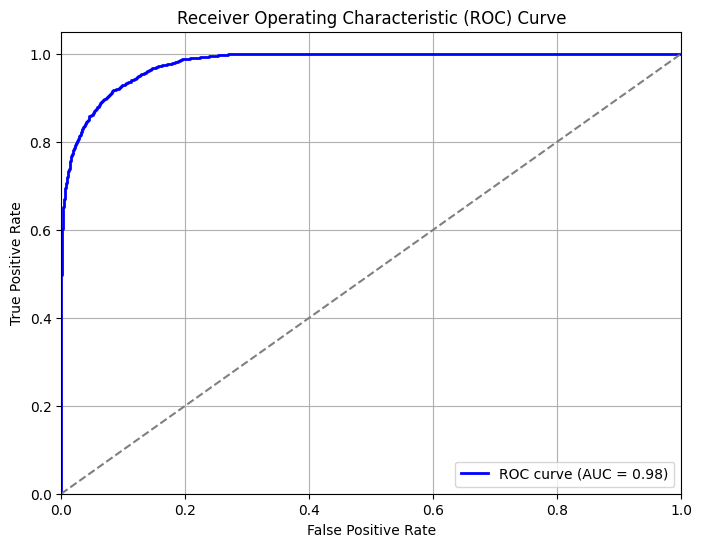

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities (instead of just 0/1 labels)
y_scores = model_xgb.predict_proba(X_test)[:, 1]  # Take only the probabilities for class 1

# Compute True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Neural Network

Now let's build a neural network for binary classification.

In [ ]:
#import the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping  

# Step 1: Create the model
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # We use sigmoid activation because the problem is binary classification
])

# Step 2: Compile the model
model_nn.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Step 3: Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 4: Fit the model with EarlyStopping callback
history = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Let's evaluate the neural network.

In [ ]:
#Evaluate the Neural Network model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f'Accuracy of Neural Network: {accuracy:.2f}')

Let's plot the curves from the loss & accuracy of the model during it's training.

In [ ]:
#Let's plot the loss,accuracy of the model during it's training
import matplotlib.pyplot as plt

# Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss during training')
plt.show()

# Accuracy Curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy during training')
plt.show()

From the above we curves we can see that the model is not overfitting.
There are low of ways to improve the performance of the model.

* Add layers
* Add more filters on the layers
* Train for longer
* Get more data
* Change the learining rate

We tried some from the above (adding layers, adding filters) but all had the similar performance with the initial neural network.

Now let's see the confusion matrix & ROC-AUC Curve from the neural network model.

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      6987
         1.0       0.86      0.77      0.81      2010

    accuracy                           0.92      8997
   macro avg       0.90      0.87      0.88      8997
weighted avg       0.92      0.92      0.92      8997



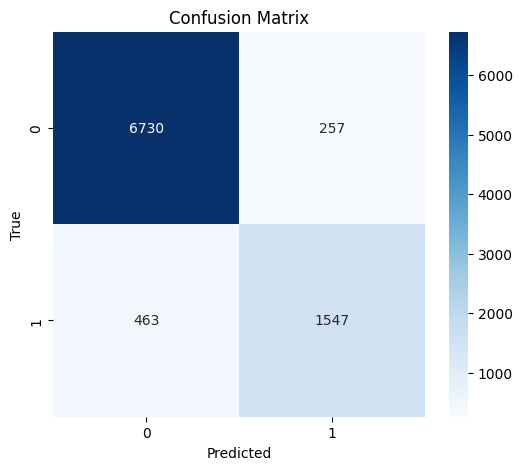

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test dataset
y_pred = model_nn.predict(X_test)


# The output of the model is most probably on the range (0-1), we must transform them to binary (0 & 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# prin the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

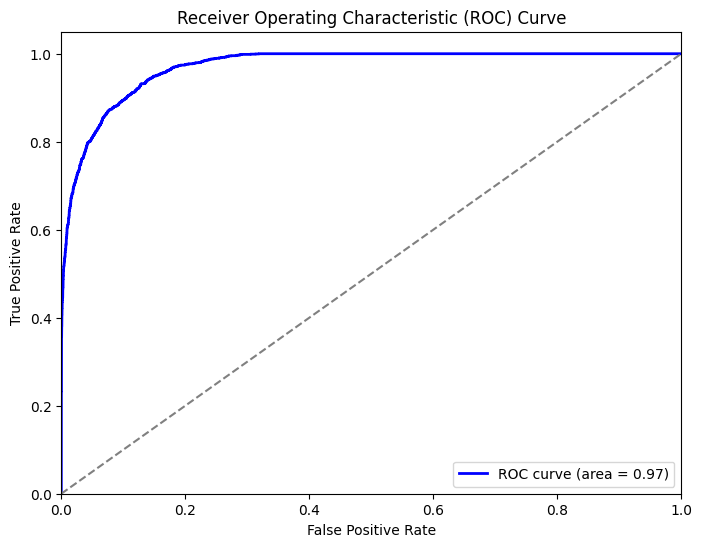

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the values of the FPR (False Positive Rate), TPR (True Positive Rate) & Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculaate the AUC
roc_auc = auc(fpr, tpr)

# Print the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no discrimination
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()